<a href="https://colab.research.google.com/github/JASHANBHULLAR4759/COLLEGE-ASSIGNMENT-2/blob/main/Sales_Rep_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1189389582.py:15: SyntaxWarning: invalid escape sequence '\$'
  transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-1189389582.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_spending.index, y=weekday_spending.values, palette='coolwarm')
/tmp/ipython-input-1189389582.py:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


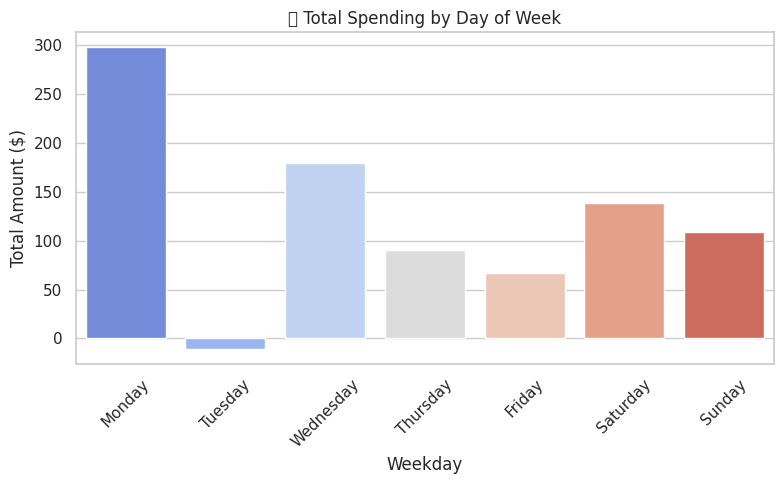

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/tmp/ipython-input-1189389582.py:37: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


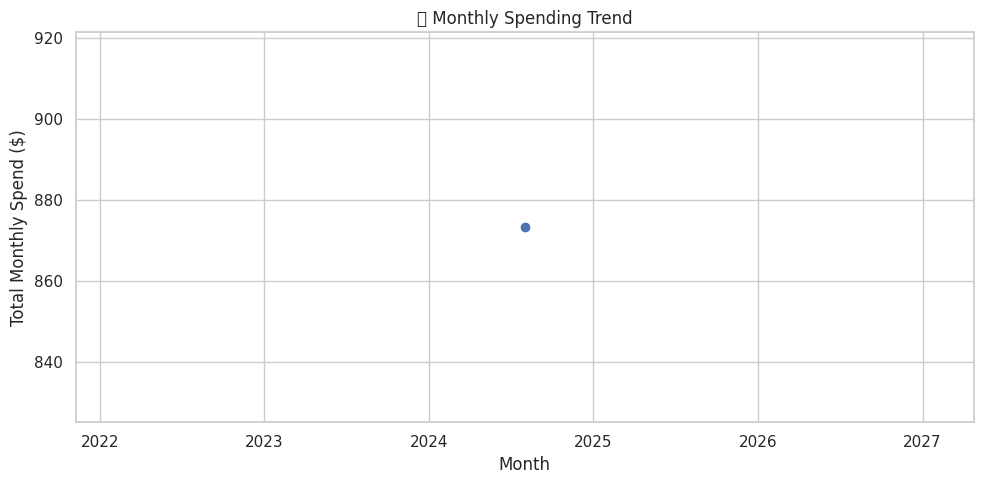

⚠️ Unusual High-Spend Days:
Empty DataFrame
Columns: [Date, Amount]
Index: []


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
transactions_df = pd.read_csv('transactions.csv')

# 1. Convert Date column
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])

# 2. Add weekday column
transactions_df['Weekday'] = transactions_df['Date'].dt.day_name()

# 3. Clean Amount column
transactions_df['Amount'] = transactions_df['Amount'].replace('[\$,]', '', regex=True).astype(float)

# 4. Spending by weekday
weekday_spending = transactions_df.groupby('Weekday')['Amount'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(8,5))
sns.barplot(x=weekday_spending.index, y=weekday_spending.values, palette='coolwarm')
plt.title("📅 Total Spending by Day of Week")
plt.ylabel("Total Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Spending over time (monthly)
transactions_df['Month'] = transactions_df['Date'].dt.to_period('M')
monthly_spending = transactions_df.groupby('Month')['Amount'].sum()

monthly_spending.plot(kind='line', marker='o', figsize=(10,5), title="📈 Monthly Spending Trend")
plt.ylabel("Total Monthly Spend ($)")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Detect outliers (days with unusually high spend)
daily_spend = transactions_df.groupby('Date')['Amount'].sum().reset_index()
q1 = daily_spend['Amount'].quantile(0.25)
q3 = daily_spend['Amount'].quantile(0.75)
iqr = q3 - q1
threshold = q3 + 1.5 * iqr

outliers = daily_spend[daily_spend['Amount'] > threshold]
print("⚠️ Unusual High-Spend Days:")
print(outliers)
